## K-means法について

K-means法は、機械学習におけるクラスタリング手法の一つで、データセットをK個のクラスタに分割するために使用されます。各クラスタは、その中心（セントロイド）によって定義されます。K-means法は反復的なアルゴリズムであり、クラスタの中心を更新しながらクラスタを最適化します。

### アルゴリズムのステップ

K-means法は以下のステップに従って実行されます：

1. **初期化**：データセットからランダムにK個の初期セントロイドを選択します。
2. **割り当て**：各データ点を最も近いセントロイドに割り当てます。
3. **更新**：各クラスタの新しいセントロイドを計算します。新しいセントロイドは、クラスタに属するすべてのデータ点の平均です。
4. **収束**：セントロイドが変化しなくなるまで（または変化が小さくなるまで）、ステップ2とステップ3を繰り返します。

### 数式

- データセット：$X = \{x_1, x_2, \ldots, x_n\}$ ここで、$x_i$ はデータポイント
- クラスタ数：$K$
- セントロイド：$C = \{c_1, c_2, \ldots, c_K\}$ ここで、$c_i$ はクラスタ $i$ のセントロイド

ステップの詳細：

1. 初期化：
   - 任意のK個のデータ点を初期セントロイドとして選択します。

2. 割り当て：
   - 各データ点 $x_i$ を最も近いセントロイド $c_j$ に割り当てます。
   $$
   \text{Cluster}(x_i) = \arg\min_{j} \|x_i - c_j\|^2
   $$

3. 更新：
   - 各クラスタの新しいセントロイドを計算します。
   $$
   c_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i
   $$

### 実装例

以下に、Pythonを用いてK-means法を実装する例を示します。ここでは、scikit-learnを使用してIrisデータセットをクラスタリングします。


このコードでは、Irisデータセットを3つのクラスタに分割し、結果をプロットしています。各データ点は異なる色で表示され、セントロイドは赤い「x」マークで示されています。

### 特徴と注意点

1. **選択するクラスタ数**：
   - K-means法の大きな課題の一つは、クラスタ数Kを事前に指定する必要があることです。適切なクラスタ数を選択するために、エルボー法やシルエット分析などの手法が使用されます。

2. **初期セントロイドの選択**：
   - 初期セントロイドの選択により結果が異なることがあります。これを改善するために、複数回アルゴリズムを実行して最適な結果を選ぶか、K-means++のような改良された初期化手法を使用します。

3. **データのスケーリング**：
   - K-meansは距離ベースのアルゴリズムであるため、異なるスケールの特徴量が含まれる場合は標準化や正規化を行うことが重要です。

4. **非凸データへの適用**：
   - K-meansは球状のクラスタに対して効果的ですが、非凸のクラスタやサイズが異なるクラスタには適用が難しいことがあります。このような場合、他のクラスタリング手法（例：DBSCANや階層的クラスタリング）を検討することが推奨されます。

### まとめ

K-means法はシンプルで計算効率が高いクラスタリング手法で、多くの実用的なアプリケーションにおいて広く使用されています。適切なクラスタ数の選択とデータの前処理が重要であり、アルゴリズムの特性を理解して適用することが求められます。

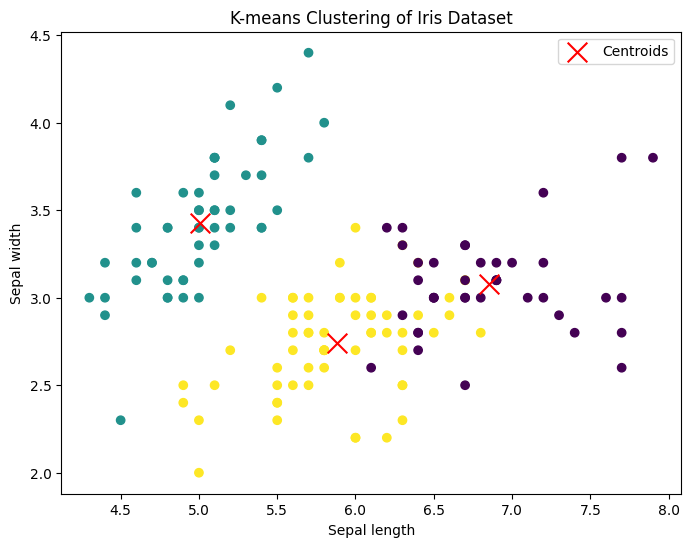

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Irisデータセットの読み込み
iris = load_iris()
X = iris.data

# K-meansクラスタリングの実行
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# クラスタリング結果の取得
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# クラスタリング結果のプロット（2次元に限定）
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-means Clustering of Iris Dataset')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()